# 1. Exploring your data

Katakanlah Anda baru saja mendapatkan dataset baru dan ingin sekali mulai menjelajahinya. Tetapi di mana Anda memulai, dan bagaimana Anda bisa yakin bahwa dataset Anda bersih? Bab ini akan memperkenalkan Anda untuk pembersihan data dengan Python. Anda akan belajar bagaimana mengeksplorasi data Anda dengan mata untuk mendiagnosis masalah seperti pencilan (*outliers*), nilai yang hilang (*missing values*), dan baris duplikat.

## Diagnose data for cleaning

### Loading and viewing your data

Dalam bab ini, Anda akan melihat subset dataset Pengajuan Aplikasi Pekerjaan Departemen Bangunan dari portal [Data Terbuka NYC](http://opendata.cityofnewyork.us/). Dataset ini terdiri dari lamaran pekerjaan yang diajukan pada 22 Januari 2017.

Tugas pertama Anda adalah memuat dataset ini ke dalam DataFrame dan kemudian memeriksanya menggunakan metode `.head()` dan `.tail()`. Namun, Anda akan mengetahui dengan sangat cepat bahwa hasil cetak tidak memungkinkan Anda melihat semua yang Anda butuhkan, karena ada terlalu banyak kolom. Karena itu, Anda perlu melihat data dengan cara lain.

Atribut `.shape` dan `.columns` memungkinkan Anda melihat bentuk DataFrame dan mendapatkan daftar kolomnya. Dari sini, Anda dapat melihat kolom mana yang relevan dengan pertanyaan yang ingin Anda tanyakan dari data tersebut. Untuk tujuan ini, DataFrame baru, `df_subset`, yang hanya terdiri dari kolom yang relevan ini, telah dimuat sebelumnya. Ini adalah DataFrame yang akan Anda gunakan di sisa bab ini.

Kenali dataset sekarang dengan menjelajahinya dengan pandas! Analisis eksplorasi awal ini merupakan langkah penting pertama pembersihan data.

In [3]:
# Import pandas
import pandas as pd

url = 'https://assets.datacamp.com/production/repositories/666/datasets/b54f64ca50c859e38fd68bcc7c932d09976709b8/dob_job_application_filings_subset.csv'

# Read the file into a DataFrame: df
df = pd.read_csv(url, low_memory=False)

# Print the head of df
print(df.head())

# Print the tail of df
print(df.tail())

# Print the shape of df
print(df.shape)

# Print the columns of df
print(df.columns)

       Job #  Doc #        Borough       House #  \
0  121577873      2      MANHATTAN  386            
1  520129502      1  STATEN ISLAND  107            
2  121601560      1      MANHATTAN  63             
3  121601203      1      MANHATTAN  48             
4  121601338      1      MANHATTAN  45             

                        Street Name  Block  Lot    Bin # Job Type Job Status  \
0  PARK AVENUE SOUTH                   857   38  1016890       A2          D   
1  KNOX PLACE                          342    1  5161350       A3          A   
2  WEST 131 STREET                    1729    9  1053831       A2          Q   
3  WEST 25TH STREET                    826   69  1015610       A2          D   
4  WEST 29 STREET                      831    7  1015754       A3          D   

   ...               Owner's Last Name             Owner's Business Name  \
0  ...  MIGLIORE                        MACKLOWE MANAGEMENT                
1  ...  BLUMENBERG                      NA            

In [7]:
list_columns = ['Job #', 'Doc #', 'Borough', 'Initial Cost', 'Total Est. Fee', 'Existing Zoning Sqft',
                'Proposed Zoning Sqft', 'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
                'Proposed No. of Stories', 'Existing Height', 'Proposed Height']

df_subset = pd.read_csv(url, usecols=list_columns)

# Print the head and tail of df_subset
print(df_subset.head())
print(df_subset.tail())

       Job #  Doc #        Borough Initial Cost Total Est. Fee  \
0  121577873      2      MANHATTAN    $75000.00        $986.00   
1  520129502      1  STATEN ISLAND        $0.00       $1144.00   
2  121601560      1      MANHATTAN    $30000.00        $522.50   
3  121601203      1      MANHATTAN     $1500.00        $225.00   
4  121601338      1      MANHATTAN    $19500.00        $389.50   

   Existing Zoning Sqft  Proposed Zoning Sqft  Enlargement SQ Footage  \
0                     0                     0                       0   
1                     0                     0                       0   
2                     0                     0                       0   
3                     0                     0                       0   
4                     0                     0                       0   

   Street Frontage  ExistingNo. of Stories  Proposed No. of Stories  \
0                0                       0                        0   
1              143    

**Note** : Kerja bagus! Selain angka `0` yang mencurigakan, yang mungkin mewakili data yang hilang, perhatikan bahwa kolom yang berisi nilai moneter - `'Initial Cost'` dan `'Total Est. Fee'` - memiliki tanda dolar di awal. Kolom ini dapat dikodekan sebagai string, bukan nilai numerik. Anda akan memeriksanya di latihan selanjutnya.

### Further diagnosis

Dalam latihan sebelumnya, Anda mengidentifikasi beberapa data yang berpotensi `unclean` atau `missing`. Sekarang, Anda akan terus mendiagnosis data Anda dengan metode `.info()` yang sangat berguna.

Metode `.info()` memberikan informasi penting tentang DataFrame, seperti jumlah baris, jumlah kolom, jumlah nilai yang tidak hilang di setiap kolom, dan tipe data yang disimpan di setiap kolom. Ini adalah jenis informasi yang akan memungkinkan Anda untuk mengkonfirmasi apakah `'Initial Cost'` dan `'Total Est. Fee'`. Kolom biaya berupa angka atau string. Dari hasil, Anda juga dapat melihat apakah semua kolom memiliki data lengkap atau tidak.

In [8]:
# Print the info of df
print(df.info())

# Print the info of df_subset
print(df_subset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 82 columns):
Job #                           12846 non-null int64
Doc #                           12846 non-null int64
Borough                         12846 non-null object
House #                         12846 non-null object
Street Name                     12846 non-null object
Block                           12846 non-null int64
Lot                             12846 non-null int64
Bin #                           12846 non-null int64
Job Type                        12846 non-null object
Job Status                      12846 non-null object
Job Status Descrp               12846 non-null object
Latest Action Date              12846 non-null object
Building Type                   12846 non-null object
Community - Board               12846 non-null object
Cluster                         0 non-null float64
Landmarked                      2067 non-null object
Adult Estab                     1 no

**Note** : Perhatikan bahwa kolom `'Initial Cost'` dan `'Total Est. Fee'` adalah tipe `object`. Tanda mata uang di awal setiap nilai dalam kolom ini harus dihapus, dan kolom harus dikonversi ke angka. Dalam DataFrame lengkap, perhatikan bahwa ada banyak nilai yang hilang. Anda melihat dalam latihan sebelumnya bahwa ada juga banyak nilai `0`. Mengingat jumlah data yang hilang dalam dataset lengkap, sangat mungkin bahwa `0` nilai ini mewakili data yang hilang.

## Exploratory data analysis

### Calculating summary statistics

Sekarang Anda akan menggunakan metode `.describe()` untuk menghitung statistik ringkasan data Anda.

Dalam latihan ini, DataFrame yang disesuaikan telah disiapkan untuk Anda periksa, dengan lebih sedikit kolom untuk meningkatkan keterbacaan di IPython Shell.

In [9]:
df = pd.read_csv(url, usecols=['Street Frontage', 'Existing Height', 'Proposed Height'])

df.describe()

,Street Frontage,Existing Height,Proposed Height
count,12846.000000,12846.000000,12846.000000
mean,3.069360,94.022809,94.917562
std,37.246034,146.917360,146.580666
min,0.000000,0.000000,0.000000
25%,0.000000,20.000000,21.000000
50%,0.000000,45.000000,45.000000
75%,0.000000,105.000000,107.000000
max,3160.000000,4200.000000,4200.000000


### Frequency counts for categorical data

Seperti yang Anda lihat, `.describe ()` hanya dapat digunakan pada kolom numerik. Jadi bagaimana Anda bisa mendiagnosis masalah data saat Anda memiliki data kategorikal? Salah satu cara adalah dengan menggunakan metode `.value_counts()`, yang mengembalikan jumlah frekuensi untuk setiap nilai unik dalam kolom.

Metode ini juga memiliki parameter opsional yang disebut `dropna` dan `True` secara default. Artinya adalah jika Anda memiliki data yang hilang di kolom, itu tidak akan memberikan jumlah frekuensi mereka. Anda ingin mengatur kolom `dropna` ke `False` sehingga jika ada nilai yang hilang dalam kolom, itu akan memberi Anda jumlah frekuensi.

Dalam latihan ini, Anda akan melihat kolom `'Borough'`, `'State'`, dan `'Site Fill'` untuk memastikan semua nilai di sana valid. Saat melihat output, lakukan pemeriksaan: Apakah semua nilai di kolom `'State'` dari `NY`, misalnya? Karena dataset terdiri dari aplikasi yang diajukan di NY, Anda akan mengharapkan hal ini terjadi.

In [10]:
df = pd.read_csv(url, usecols=['Borough', 'State', 'Site Fill'])

In [11]:
# Print the value counts for 'Borough'
print(df['Borough'].value_counts(dropna=False))

# Print the value_counts for 'State'
print(df['State'].value_counts(dropna=False))

# Print the value counts for 'Site Fill'
print(df['Site Fill'].value_counts(dropna=False))

MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64
NY    12391
NJ      241
PA       38
CA       20
OH       19
FL       17
IL       17
CT       16
TX       13
TN       10
DC        7
MD        7
KS        6
MA        6
GA        6
VA        5
CO        4
SC        3
MN        3
WI        3
AZ        3
NC        2
RI        2
UT        2
NM        1
WA        1
MI        1
IN        1
VT        1
Name: State, dtype: int64
NOT APPLICABLE                              7806
NaN                                         4205
ON-SITE                                      519
OFF-SITE                                     186
USE UNDER 300 CU.YD                          130
Name: Site Fill, dtype: int64


**Note** :
* Perhatikan bagaimana tidak semua nilai di kolom 'State' adalah NY. Ini adalah temuan yang menarik, karena data ini seharusnya terdiri dari aplikasi yang diajukan di NYC. 
* Anehnya, semua nilai 'Borough' benar. Awal yang baik mengapa hal ini mungkin terjadi adalah menemukan dan melihat codebook untuk dataset ini. 
* Untuk kolom 'Site Fill', Anda mungkin tidak perlu mengode ulang nilai `NOT APPLICABLE` ke `NaN` dalam analisis akhir Anda.

## Visual exploratory data analysis

### Visualizing single variables with histograms

Sampai sekarang, Anda telah melihat statistik deskriptif dari data Anda. Salah satu cara terbaik untuk mengonfirmasi apa yang angka-angka katakan kepada Anda adalah merencanakan dan memvisualisasikan data.

Anda akan mulai dengan memvisualisasikan variabel tunggal menggunakan histogram untuk nilai numerik. Kolom yang akan Anda kerjakan dalam latihan ini adalah `'Existing Zoning Sqft'`.

Metode `.plot()` memungkinkan Anda untuk membuat plot dari setiap kolom DataFrame. Parameter `kind` memungkinkan Anda menentukan jenis plot yang akan digunakan - `kind='hist'`, misalnya, memplot histogram.

Di IPython Shell, mulailah dengan menghitung ringkasan statistik untuk kolom 'Sqft Zonasi Yang Ada' menggunakan metode `.describe()`. Anda akan melihat bahwa ada perbedaan yang sangat besar antara nilai `min` dan `max`, dan plot perlu disesuaikan. Dalam kasus seperti itu, ada baiknya untuk melihat plot pada skala log. Argumen kata kunci `logx=True` atau `logy=True` dapat diteruskan ke `.plot()` tergantung pada sumbu mana yang ingin Anda skala ulang.

In [13]:
df = pd.read_csv(url)

# Describe the column
print(df['Existing Zoning Sqft'].describe())

count    1.284600e+04
mean     1.439973e+03
std      3.860757e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.873107e+06
Name: Existing Zoning Sqft, dtype: float64


Akhirnya, perhatikan bahwa Python akan membuat plot sehingga sumbu akan menampung semua informasi. Artinya, jika Anda memiliki spasi putih dalam plot Anda, ini menunjukkan jumlah atau nilai yang terlalu kecil untuk dirender.

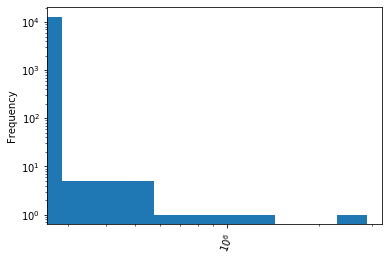

In [14]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Plot the histogram
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)

# Display the histogram
plt.show()

**Note** : Memvisualisasikan data Anda adalah cara yang bagus untuk memahaminya, perlu diingat bahwa tidak ada satu teknik yang lebih baik dari yang lain. Seperti yang Anda lihat di sini, Anda masih perlu melihat statistik ringkasan untuk membantu memahami data Anda dengan lebih baik. Anda mengharapkan sejumlah besar penghitungan di sisi kiri plot karena persentil ke-25, ke-50, dan ke-75 memiliki nilai `0`. Plot menunjukkan kepada kita bahwa hampir tidak ada penghitungan di dekat nilai `max`, menandakan *outliers*.

### Visualizing multiple variables with boxplots

Histogram adalah cara yang bagus untuk memvisualisasikan variabel tunggal. Untuk memvisualisasikan banyak variabel, boxplots sangat berguna, terutama ketika salah satu variabelnya kategorikal.

Dalam latihan ini, tugas Anda adalah menggunakan boxplot untuk membandingkan `'initial_cost'` di berbagai nilai kolom `'Borough'`. Metode pandas `.boxplot()` adalah cara cepat untuk melakukan ini, di mana Anda harus menentukan `column` dan parameter `by`. Di sini, Anda ingin memvisualisasikan bagaimana `'initial_cost'` bervariasi oleh `'Borough'`.

**Note** : Untuk menjalankan kode dibawah ini, Anda harus membuat kolom baru `initial_cost` dengan data yang berisi dolar sudah dihilangkan.

In [ ]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt

# Create the boxplot
df.boxplot(column='initial_cost', by='Borough', rot=90)

# Display the plot
plt.show()

**Note** : Anda dapat melihat 2 outlier ekstrim berada di wilayah Manhattan. Perkiraan awal bisa jadi karena tanah di Manhattan sangat mahal, outlier ini mungkin merupakan titik data yang valid. Sekali lagi, penyelidikan lebih lanjut diperlukan untuk menentukan apakah Anda dapat menjatuhkan atau menyimpan poin-poin itu dalam data Anda.

### Visualizing multiple variables with scatter plots

Boxplots sangat bagus ketika Anda memiliki kolom angka yang ingin Anda bandingkan di berbagai kategori. Saat Anda ingin memvisualisasikan dua kolom numerik, scatter plot sangat ideal.

Dalam latihan ini, tugas Anda adalah membuat scatter plot dengan `'initial_cost'` pada sumbu x dan `'total_est_fee'` pada sumbu y. Anda dapat melakukan ini dengan menggunakan metode DataFrame `.plot()` dengan `kind='scatter'`. Anda akan segera melihat bahwa ada 2 outlier utama yang ditampilkan dalam plot.

Karena outlier ini mendominasi plot, DataFrame tambahan, `df_subset`, telah disediakan, di mana beberapa nilai ekstrem telah dihapus. Setelah membuat scatter plot menggunakan ini, Anda akan menemukan beberapa pola menarik di sini yang tidak akan terlihat dengan melihat statistik ringkasan atau 1 plot variabel.

In [ ]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt

# Create and display the first scatter plot
df.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)
plt.show()

# Create and display the second scatter plot
df_subset.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)
plt.show()

**Note** : Secara umum, dari plot kedua sepertinya ada korelasi kuat antara `'initial_cost'` dan `'total_est_fee'`. Selain itu, perhatikan sejumlah besar poin yang memiliki `'initial_cost'` dari 0. Sulit untuk menyimpulkan tren dari plot pertama karena didominasi oleh outlier.